In [1]:
import discretisedfield as df
import oommfc as oc
import numpy as np
import math
from math import pi
from random import *


radius=150e-9
L = radius + 10e-9
height= 20e-9
cellsize = 2e-9  # discretisation in all three dimensions.
A = 7e-12  # exchange energy constant (J/m)
K = 5.68e4  # Uniaxial anisotropy constant (J/m^3) 5.88e4
u = (0, 0, 1)  # Uniaxial anisotropy easy-axis
Ms= 8.9e4 # Saturation magnetization (A/m)
gamma = 2.211e5  #gyromagnetic ratio
alpha = 0.05 #Gilbert damping
#D = -0.98e-3 #DMI constant (J/m^2)
#crystalclass="Cnv" #interfacial DMI, instead of "D2d" antiskyrmion DMI
# H=(8e6,0,0) #(A/m)

#mesh setup 
p1 = (-L, -L, -height/2)  # Minimum sample coordinate.
p2 = (L, L, height/2)  # Maximum sample coordinate.
cell = (cellsize, cellsize, cellsize)  # Discretisation.
mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)  # Create a mesh object.

# Function for initialising magnetization


def m_init(pos):
    x, y, z = pos
    r = math.sqrt((x)**2 + (y)**2)
    x1=uniform(-1,1)
    x2=uniform(-1,1)
    x3=uniform(-1,1)
    maximum=max(abs(x1),abs(x2),abs(x3))
    rim=radius-10e-9
    if r <= rim:
        return (0,0,1)
    if rim < r <= radius:
        return (x1/maximum, x2/maximum, x3/maximum)
    if r> radius:
        return (1,0,0)
    
#defining cylinder and saturation    
def Ms_function(pos):
    x, y, z = pos
    r = math.sqrt((x)**2 + (y)**2)
    if r <= radius and -height/2 <= z <= height/2:
        return Ms # (A/m) same as GdFeCo
    else:
        return 0
    

In [2]:
system = oc.System(name="Nanodot")
system.hamiltonian = oc.Exchange(A) + oc.UniaxialAnisotropy(K, u) + oc.Demag()  + oc.DMI(crystalclass="Cnv", D=-0.98e-3) # + oc.Zeeman(H=H)
system.hamiltonian

Exchange(A=7e-12, name="exchange") + UniaxialAnisotropy(K1=56800.0, K2=0, u=(0, 0, 1), name="uniaxialanisotropy") + Demag(name="demag") + DMI(D=-0.00098, crystalclass="cnv", name="dmi")

In [3]:
system.dynamics = oc.Precession(gamma) + oc.Damping(alpha)
system.dynamics

Precession(gamma=221100.0, name="precession") + Damping(alpha=0.05, name="damping")

In [4]:
system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms_function)

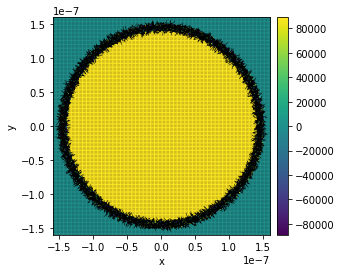

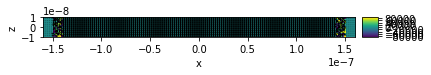

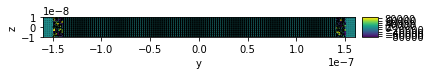

In [5]:
%matplotlib inline
system.m.plot_plane("z")
system.m.plot_plane("y")
system.m.plot_plane("x")
mz_initial = system.m.average[2]

2018/09/24 00:27: Running OOMMF (Nanodot/Nanodot.mif) ... (134.7 s)


(4.726796024812074e-08, 1.809151926750019e-06, 59613.16361666184)

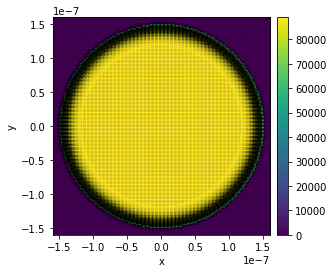

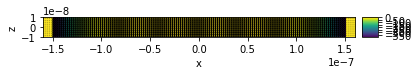

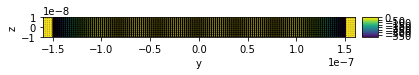

In [6]:
md = oc.MinDriver()
md.drive(system)
%matplotlib inline
system.m.plot_plane("z")
system.m.plot_plane("y")
system.m.plot_plane("x")
system.m.average

In [7]:
directionalCosine=system.m.average[2]/((system.m.average[0])**2+(system.m.average[1])**2+(system.m.average[2])**2)**(1/2)
directionalCosine

1.0

In [8]:
deltaFinalInitial = system.m.average[2]/mz_initial
deltaFinalInitial

1.1146908576998227

In [9]:
Acube=(2*L)**2
Acube

1.0240000000000001e-13

In [10]:
Acylinder=pi*radius**2
Acylinder

7.068583470577034e-14

In [11]:
Acylinder=pi*radius**2
Acube=(2*L)**2
fraction = abs(system.m.average[2]*Acube/(Acylinder*Ms))
fraction

0.9703306042295298